# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откроем файл с данными и изучите общую информацию

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# прочитаем файл
data = pd.read_csv('\\Users\\alekl\\Documents\\Практикум\\real_estate_data.csv', sep='\t')
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [18]:
# посмотрим основную информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выгрузили таблицу и получили первичные данные. Такие как название колонок, количество и тип объектов. Также видим первые 5 строчек в каждом столбце и общий размер таблицы. Не проводя дополнительной обработки видим ошибки и пропущенные значения в столбцах first_day_exposition, ceiling_height, living_area, is_apartment, kitchen_area, balcony, parks_nearest, ponds_nearest, days_exposition. 
Далее уделим этим столбцам особое внимание.

## Выполним предобработку данных

In [20]:
# проверим данные на пропуски
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим, что пропусков достаточно много. Поработаем с ними.

In [27]:
# обработаем пропуски
data['living_area'] = data['living_area'].fillna(0)
data['balcony'] = data['balcony'].fillna(0)
data = data.dropna(subset = ['floors_total'])
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['is_apartment']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    NaN
23698    NaN
Name: is_apartment, Length: 23613, dtype: object

In [31]:
# отфильтруем разумные значения высоты потолков (2.0-4.0 метра)
reasonable_mask = (data['ceiling_height'] >= 2.0) & (data['ceiling_height'] <= 4.0)
median_height = data.loc[reasonable_mask, 'ceiling_height'].median()

# заполним пропуски медианой
data['ceiling_height'] = data['ceiling_height'].fillna(median_height)
data['ceiling_height']

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23613, dtype: float64

Видим пропуски в столбцах ceiling_height, living_area, is_apartment, kitchen_area, balcony, parks_nearest,ponds_nearest, days_exposition, floors_total, locality_name, airports_nearest, cityCenters_nearest, parks_around3000. 

Пропуски в высоте потолков, размере квадратных метров, размер кухни, могут быть обусловлены человеческим фактором. Люди, заполняя таблицу могли просто не знать точный размер. Расстояние до ближайшего парка, до ближайшего аэропорта, до ближайшего водоема также могут быть от незнания, либо парков и водоемов вообще нет поблизости. 

Много пропусков в столбце является ли квартира апартаментами может быть вызвано механической ошибкой или неправильный прочтением данных.

Пропуски в наличии балконов могут говорить о том, что их нет вообще.

Пропуски в данных о размещении объявления могут указывать на то, что объявление висело меньше суток или просто этот момент забыли указать.

Количество этажей могли забыть указать, либо дом еще не достроен.

Название населенного пунтка могли пропустить,подразумевая, что этот и так понятно (Санкт-Петербург), могли случайно забыть. 

Расстояние до центра ммогли также пропустить из-за невнимамтельности, либо квартира расположена в самом центре.

Можно спокойно заменить пропуски в количестве балконов, так как это не повлияет на анализ данных. Строки со временем публикации убрать полностью не получится, так как мы потеряем большой объем данных. 

Пропуски в количестве водоемов и парков поблизости можно заменить на 0, так как скорее всего пропуски обозначают, что их поблизости нет.

In [50]:
# обработаем пропуски
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'],
    errors='coerce'  # Преобразует ошибки в NaT вместо вызова исключения
)

data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23613, dtype: datetime64[ns]

In [51]:
# изменим типы столбцов 
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

data['kitchen_area'] = data['kitchen_area'].astype('float')
data['rooms'] = data['rooms'].astype('float')
data['living_area'] = data['living_area'].astype('float')
data['last_price'] = data['last_price'].astype('float')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float')

Изменили вид данных у столбца "first_day_exposition", так как в нем содержится информация о дате и времени. У "floors_total", "balcony","parks_around3000", "ponds_around3000" и "days_exposition" изменили тип на целые числа, так как переменные не могут исчесляться по-другому. У "is_apartment" изменили на формат булевых значений. 

In [54]:
# проверим наличие явных дубликатов
data.duplicated().sum()

0

In [56]:
# проверим и обработаем наличие неявных дубликатов
data['locality_name'].unique()

data['locality_name'] = (
    data['locality_name']
    .str.replace('деревня', '')
    .replace(['деревня', 'поселок городского типа','посёлок ', 'поселок', 'городского типа', 'коттеджный', 'городской', 'село', 'садовое товарищество', 'садоводческое некоммерческое товарищество'], '', regex=True)
)

Вывели уникальные значения. Для избежания путаницы, убрали названия типа населенных пунктов.

**Промежуточный вывод**

Этап предобработки данных завершен. Это очень важный этап, так как на нем мы приводим данные в надлежащий порядок, заменяя пропущенные значения актуальными и убирая те, которые невозможно восстановить и которые не будут играть существенную роль в дальнейшем анализе. 

Заменили и удалили значения, привели данные в нужный формат и убедились, что явных дубликатов нет. Можно приступать к исследовательской работе.

## Проведем исследовательский анализ данных

In [57]:
# добавили переменную - цена одного кв метра
data['price_meter'] = data['last_price']/data['total_area']
round(data['price_meter'], 2)

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_meter, Length: 23613, dtype: float64

In [58]:
# добавили переменную - день недели публикации объявления
data['weekday_publish'] = data['first_day_exposition'].dt.weekday 
data['weekday_publish']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday_publish, Length: 23613, dtype: int32

In [59]:
# добавили переменную - месяц публикации объявления
data['mounth_publish'] = data['first_day_exposition'].dt.month
data['mounth_publish']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: mounth_publish, Length: 23613, dtype: int32

In [60]:
# добавили переменную - год публикации объявления
data['year_publish'] = data['first_day_exposition'].dt.year
data['year_publish']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_publish, Length: 23613, dtype: int32

In [62]:
# узнали первый и последний этажи (1 и 60)
data['floors_total'].value_counts()

# задаем условия
def type_floor_filtered(floor, floors):
    if floor == 1:
        return 'первый'
    elif floor == floors:
        return 'последний'
    return 'другой'

# присваиваем значение и создаем новый столбец
data['type_floor'] = data.apply(lambda x: type_floor_filtered(x['floor'], x['floors_total']), axis=1)
data['type_floor']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: type_floor, Length: 23613, dtype: object

In [63]:
# переводем расстояния в км и округлим до ближайших целых значений
data['cityCenters_nearest'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest'].round()

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest, Length: 23613, dtype: float64

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

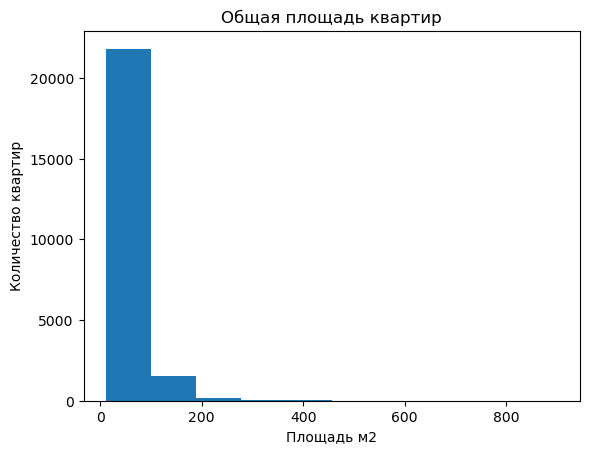

In [65]:
# построим гистограмму общей площади квартир
total_area = data['total_area']
total_area.plot(kind = 'hist', title = 'Общая площадь квартир')
plt.xlabel('Площадь м2')
plt.ylabel('Количество квартир')
data['total_area'].describe()

Построили общие представления о выборке, аномалий не наблюдается. 
Больше всего квартир с площадью до 100 кв м, меньше всего - больше 170 кв м. Видим также квартиры с самой маленькой площадью - всего 12 кв м и самая большая площадь составляет 900 кв м.
Несмотря на разброс значений, среднее площадь квартир составляет около 60 кв м.

count    21704.000000
mean        34.141704
std         20.122823
min          8.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        200.000000
Name: living_area, dtype: float64


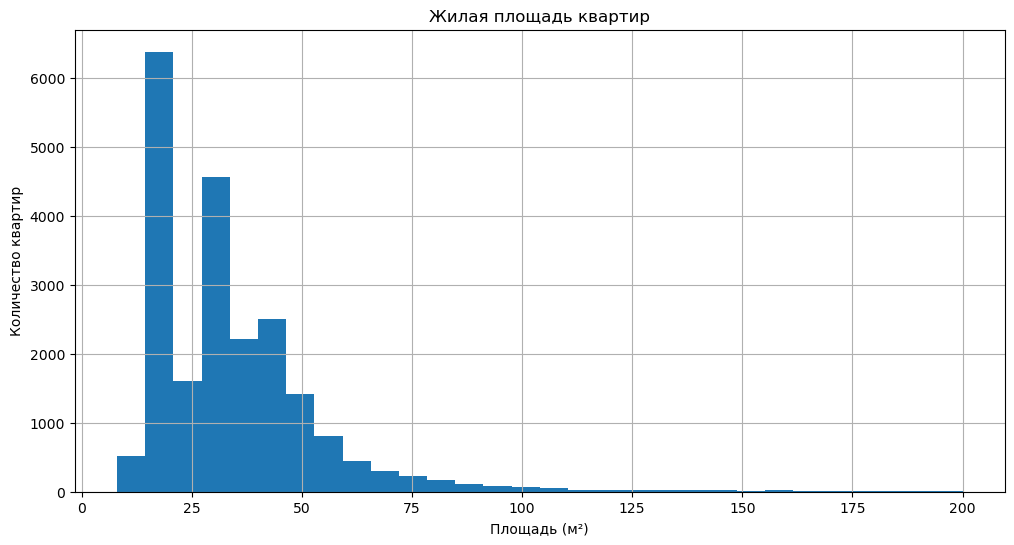

In [66]:
# фильтруем данные (жилая площадь >= 8 м² и <= 200 м², включая NaN)
data = data[(data['living_area'] >= 8) & (data['living_area'] <= 200) | (data['living_area'].isna())]

# построиим гистограмму
data['living_area'].plot(
    kind='hist',
    title='Жилая площадь квартир',
    figsize=(12, 6),
    bins=30  # Опционально: задаёт количество столбцов
)
plt.xlabel('Площадь (м²)')
plt.ylabel('Количество квартир')
plt.grid(True)  # Добавляет сетку для удобства

print(data['living_area'].describe())

На общих значениях видим, что минимальная жилая площадь квартиры равно 8. Средняя площадь квартир имеет жилую площадь около 34 кв м. 


Описательная статистика площади кухни:
count    20520.000000
mean        10.071430
std          4.151565
min          5.000000
25%          7.000000
50%          9.000000
75%         11.700000
max         30.000000
Name: kitchen_area, dtype: float64


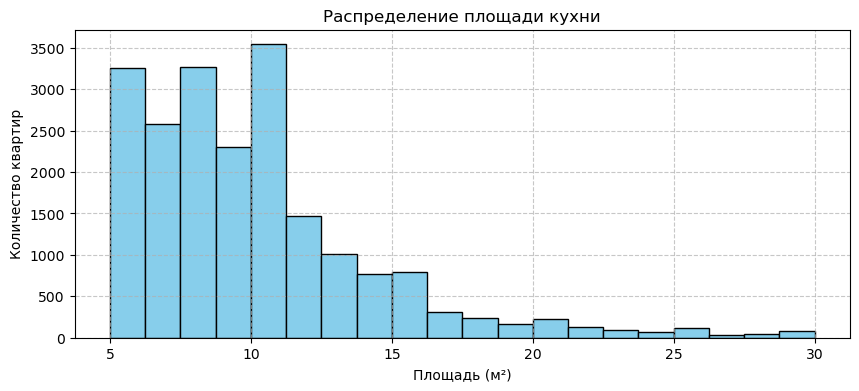

In [67]:
# фильтруем данные (кухня >= 5 м² и <= 30 м² - более реалистичные границы)
data = data[(data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 30)]

# построим гистограмму площади кухни
plt.figure(figsize=(10, 4))
data['kitchen_area'].plot(kind='hist', 
                         bins=20,
                         color='skyblue',
                         edgecolor='black',
                         title='Распределение площади кухни')
plt.xlabel('Площадь (м²)')
plt.ylabel('Количество квартир')
plt.grid(True, linestyle='--', alpha=0.7)

print("\nОписательная статистика площади кухни:")
print(data['kitchen_area'].describe())

Площадь кухни не может быть меньше 5 кв м, значит эти значения убираем. В среднем кухни имеют площадь около 10 кв м. Меньше всего квартир с площадью кухни от 20 кв м.

count    2.052000e+04
mean     6.070048e+06
std      6.344951e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.650000e+06
75%      6.686250e+06
max      2.450000e+08
Name: last_price, dtype: float64

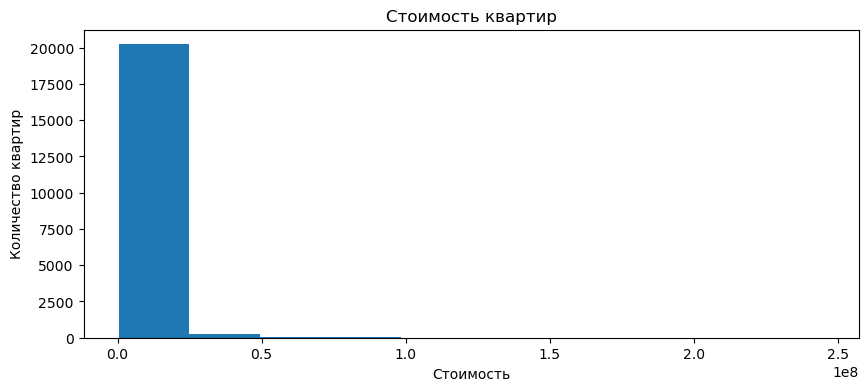

In [69]:
# построим гистограмму стоимости квартир
last_price = data['last_price']
last_price.plot(kind = 'hist', title = 'Стоимость квартир', figsize = (10,4))
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
data['last_price'].describe()

Аномалий нет. В среднем квартиры стоят около 6 млн.

Статистика по количеству комнат:
rooms
1.0    7007
2.0    6994
3.0    5129
4.0    1000
5.0     251
6.0      83
7.0      38
8.0       7
Name: count, dtype: int64

Основные статистики:
count    20509.000000
mean         2.070164
std          1.007676
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64


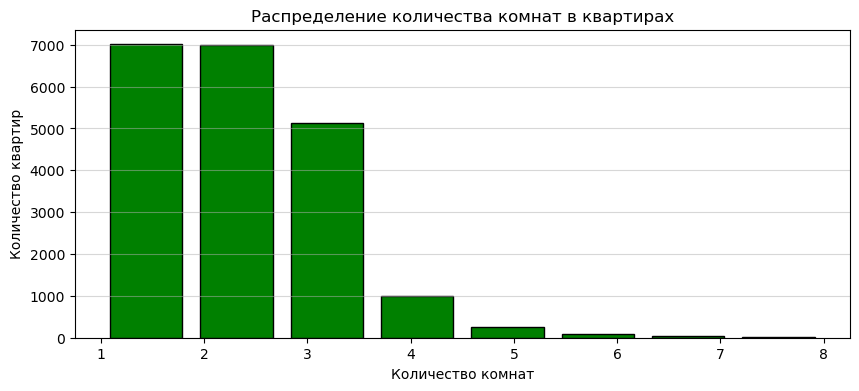

In [70]:
# отфильтруем данные
data = data[(data['rooms'] >= 1) & (data['rooms'] <= 8)]

# построим гистограмму количества комнат
plt.figure(figsize=(10, 4))
data['rooms'].plot(kind='hist', 
                  bins=8,  #
                  rwidth=0.8,  
                  color='green',
                  edgecolor='black')

plt.title('Распределение количества комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.xticks(range(1, 9))  # Метки от 1 до 8
plt.grid(axis='y', alpha=0.5)

# Описательная статистика
print("Статистика по количеству комнат:")
print(data['rooms'].value_counts().sort_index())
print("\nОсновные статистики:")
print(data['rooms'].describe())

Комнат должно быть минимум 1 и не больше 8. Меньше или больше - это аномалии. Больше всего квартир с количеством комнат 1 и 2. Меньше всего - больше 6.

In [71]:
# дополнительное преобразование типов объектов
data['rooms'] = data['rooms'].astype('float')
data['living_area'] = data['living_area'].astype('float')
data['kitchen_area'] = data['kitchen_area'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20509 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20509 non-null  int64         
 1   last_price            20509 non-null  float64       
 2   total_area            20509 non-null  float64       
 3   first_day_exposition  20509 non-null  datetime64[ns]
 4   rooms                 20509 non-null  float64       
 5   ceiling_height        20509 non-null  float64       
 6   floors_total          20509 non-null  int32         
 7   living_area           20509 non-null  float64       
 8   floor                 20509 non-null  int64         
 9   is_apartment          20509 non-null  bool          
 10  studio                20509 non-null  bool          
 11  open_plan             20509 non-null  bool          
 12  kitchen_area          20509 non-null  float64       
 13  balcony              

count    20420.000000
mean         2.693686
std          0.212177
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

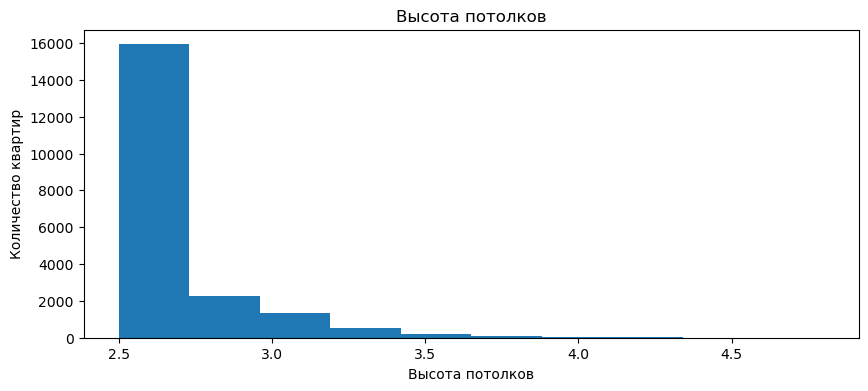

In [72]:
# построим гистограмму высоты потолков
data['ceiling_height'] = data.loc[(data['ceiling_height'] <= 5) & (data['ceiling_height'] >= 2.5), 'ceiling_height']

ceiling_height = data['ceiling_height']
ceiling_height.plot(kind = 'hist', title = 'Высота потолков', figsize = (10,4))
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
data['ceiling_height'].describe()

Потолок явно не может быть 100 м. Значит удаляем все значения, больше 5 м и меньше 2.5 м.
Видим, что большинство квартир имеют высоту около 2,7 м, меньше всего - около 2.5 м.

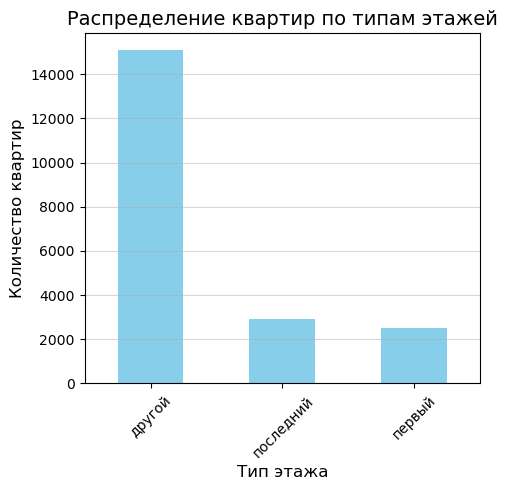

In [74]:
# построим график распределения квартир по типам этажей
plt.figure(figsize=(5, 5))

# Если тип этажа - категориальный (строка/текст):
if data['type_floor'].dtype == 'object':
    data['type_floor'].value_counts().plot(kind='bar', color='skyblue')
    plt.xticks(rotation=45)  # Поворот подписей
# Если тип этажа - числовой (например, 1-первый, 2-последний):
else:
    bins = len(data['type_floor'].unique())
    plt.hist(data['type_floor'], bins=bins, color='skyblue', edgecolor='black')

# Общее оформление
plt.xlabel('Тип этажа', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.title('Распределение квартир по типам этажей', fontsize=14)
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()  
plt.show()

Видим, что наибольшее количество - это этажи между первым и последним. Очень мало квартир с первыми и последними этажами.

count    20509.000000
mean        10.591594
std          6.522587
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

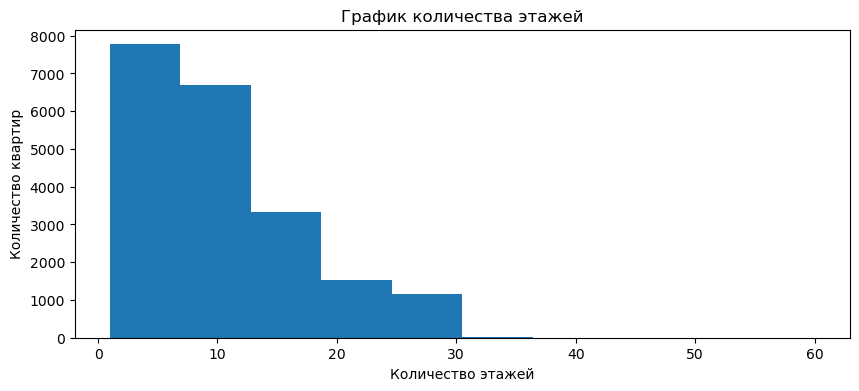

In [75]:
# построим гистограмму этажей
floors_total = data['floors_total']
floors_total.plot(kind = 'hist', title = 'График количества этажей', figsize = (10,4))
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
data['floors_total'].describe()

Немного смущают дома с этажность 60, но возможно это действительно так. Видим, что в среднем квартиры расположены на  10 этаже.

count    15907.000000
mean        14.324310
std          8.633123
min          0.181000
25%          9.508000
50%         13.165000
75%         16.293000
max         65.968000
Name: cityCenters_nearest, dtype: float64

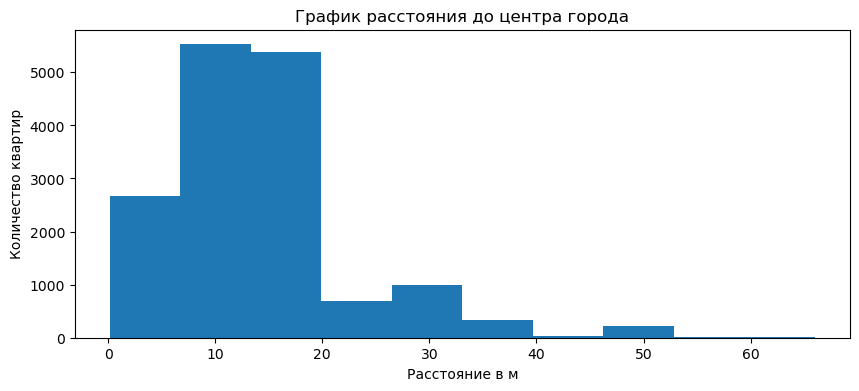

In [76]:
# построим гистограмму расстояния до центра города
cityCenters_nearest = data['cityCenters_nearest']
cityCenters_nearest.plot(kind = 'hist', title = 'График расстояния до центра города', figsize = (10,4))
plt.xlabel('Расстояние в м')
plt.ylabel('Количество квартир')
data['cityCenters_nearest'].describe()

Аномалий не вижу. В среднем квартиры расположены в 14 км от центра города. Минимальное расстояние составляет 181 м, а максимальное - 65 км.

count    7035.000000
mean      488.698934
std       335.637007
min         1.000000
25%       288.000000
50%       456.000000
75%       611.500000
max      3190.000000
Name: parks_nearest, dtype: float64

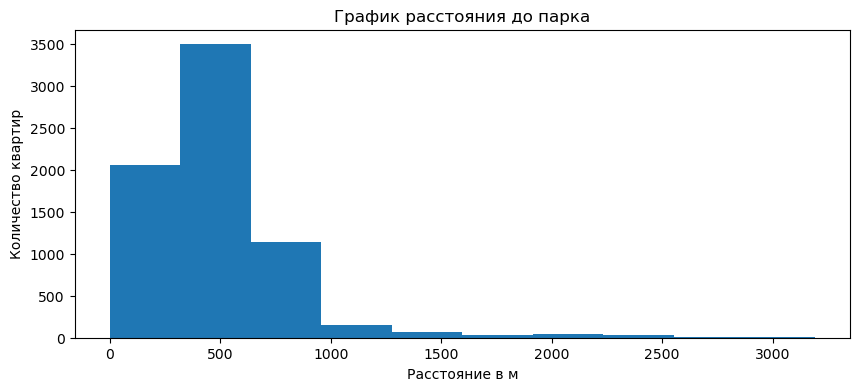

In [77]:
# построим гистограмму расстояния до парка
parks_nearest = data['parks_nearest']
parks_nearest.plot(kind = 'hist', title = 'График расстояния до парка', figsize = (10,4))
plt.xlabel('Расстояние в м')
plt.ylabel('Количество квартир')
data['parks_nearest'].describe()

Наибольшее количество квартир расположены недалеко от парков, всего около 500 - 600 м. Минимальное значение - 1 м, скорее всего квартира практически выходит в парк. Максимальное отдаление - 3 км.

count    17720.000000
mean       184.110779
std        219.965589
min          1.000000
25%         44.000000
50%        101.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

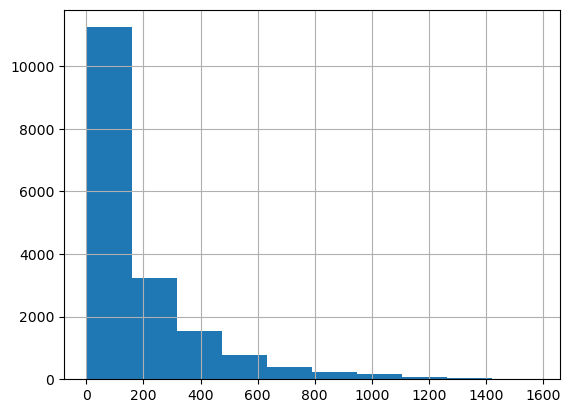

In [78]:
# узнаем, как быстро продаются квартиры
data['days_exposition'].hist()
data['days_exposition'].mean()
data['days_exposition'].median()
# медиана равна 95 дням, а среднее значение - 180

data['days_exposition'].describe()

По итогом видим, что минимальное количество дней для продажи квартиры составляет 1 день, а максимальное - около 4 лет. В целом быстрыми продажами можно считать продажи не более чем за 45 дней, а медленные - от 232 дней.

0.7090063718535132

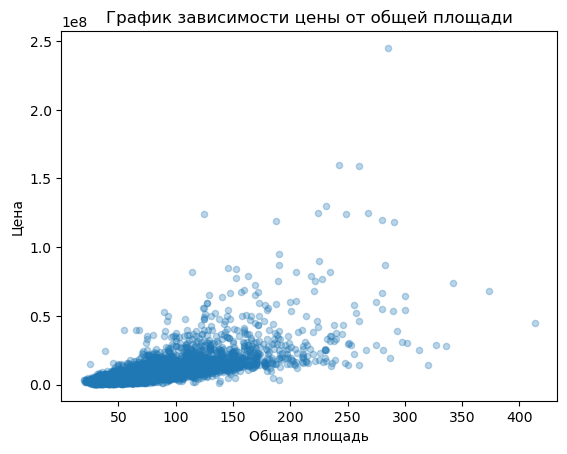

In [79]:
# рассмотрим зависимость цены от общей площади
data.plot(x = 'total_area', y = 'last_price', title = 'График зависимости цены от общей площади', kind='scatter', alpha=0.3)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
data['last_price'].corr(data['total_area'])

Видим, что корреляция достаточно сильная. Значит стоимость квартир существенно зависит от общей площади.

0.6358865315543256

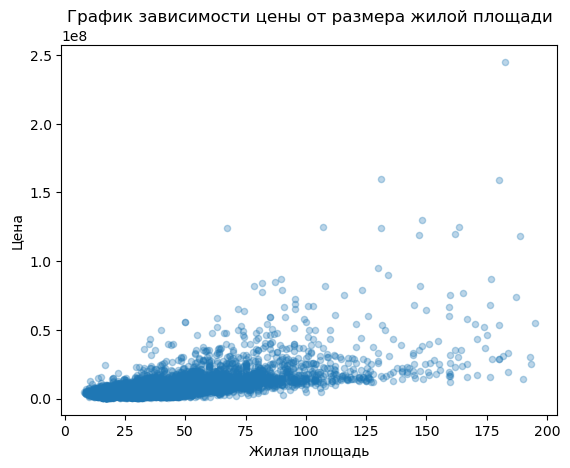

In [80]:
# зависимость цены от жилой площади
data['living_area'] = data['living_area'].astype('float')

data.plot(x = 'living_area', y = 'last_price', title = 'График зависимости цены от размера жилой площади', kind='scatter', alpha=0.3)
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
data['last_price'].corr(data['living_area'])

Корреляция слабая. Значит параметр размера жилой площади практически не влияет на цену.

0.4848731034381579

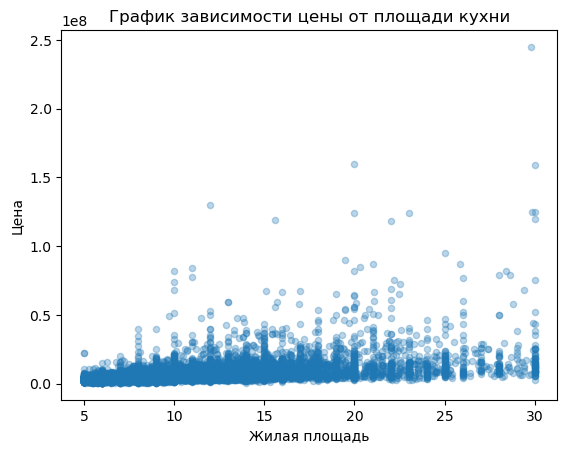

In [81]:
# зависимость цены от площади кухни
data.plot(x = 'kitchen_area', y = 'last_price', title = 'График зависимости цены от площади кухни', kind='scatter', alpha=0.3) 
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
data['last_price'].corr(data['kitchen_area'])

Связи практиченски нет. Можно сказать, что стоимость квартиры существенно не зависит от площади кухни.

0.43336933223439095

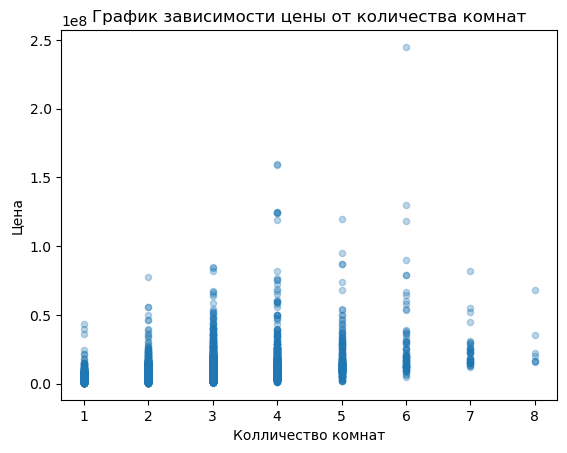

In [82]:
# зависимость цены от количества комант
data.plot(x = 'rooms', y = 'last_price', title = 'График зависимости цены от количества комнат', kind='scatter', alpha=0.3) 
plt.xlabel('Колличество комнат')
plt.ylabel('Цена')
data['last_price'].corr(data['rooms'])

Корреляция незначительная. Значит количество комнат практически никак не влияет на стоимость квартиры.

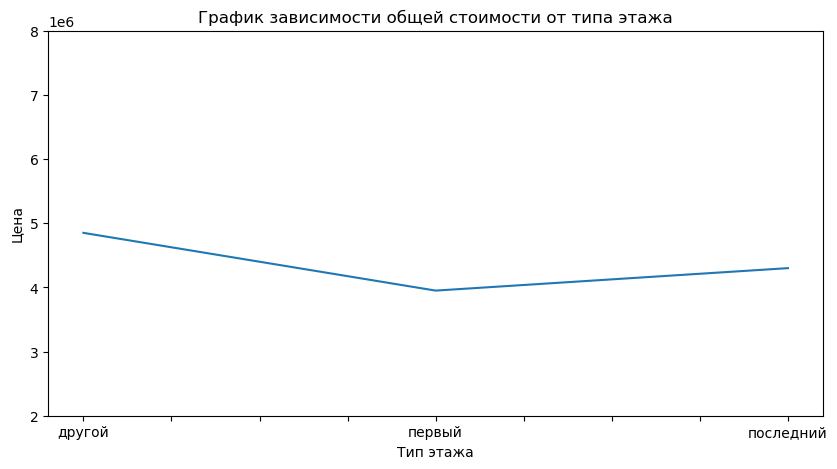

In [83]:
type_floor_pivot = data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = 'median')
type_floor_pivot.plot(title ='График зависимости общей стоимости от типа этажа', ylim = (2000000, 8000000), alpha = 1, figsize = (10, 5), legend = False)
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()

Видим, что самые дешевые квартиры - первого и последнего этажа. Самые дорогие - все остальные.

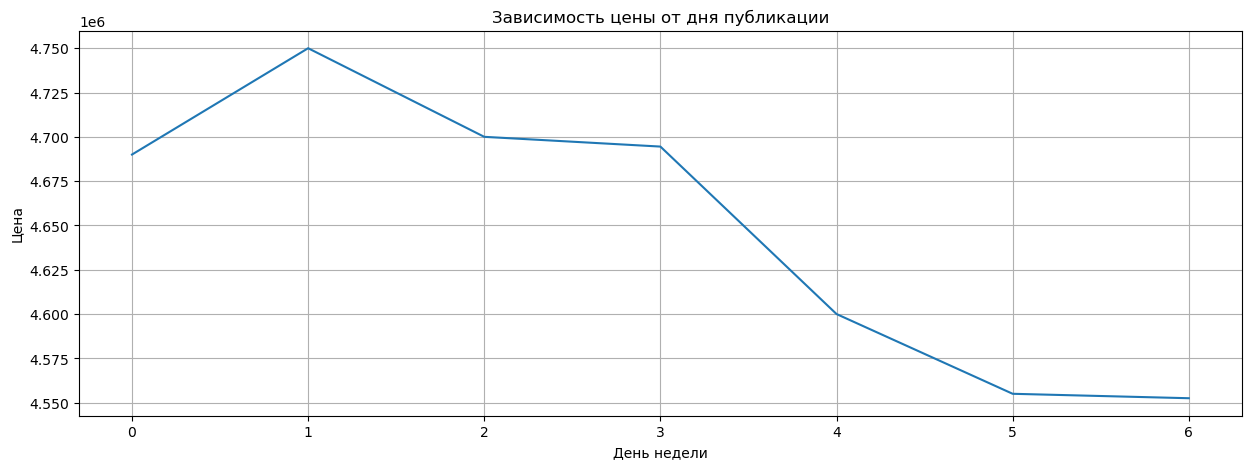

In [84]:
# зависимость цены от дня публикации
price_date_pivot = data.pivot_table(index = 'weekday_publish', values = 'last_price', aggfunc = 'median')
price_date_pivot.plot(title = 'Зависимость цены от дня публикации', figsize = (15, 5), grid = True, legend = False)
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

Видим, что по вторникам публикуют самые дорогие объявления. Самые дешевые - по воскресеньям.

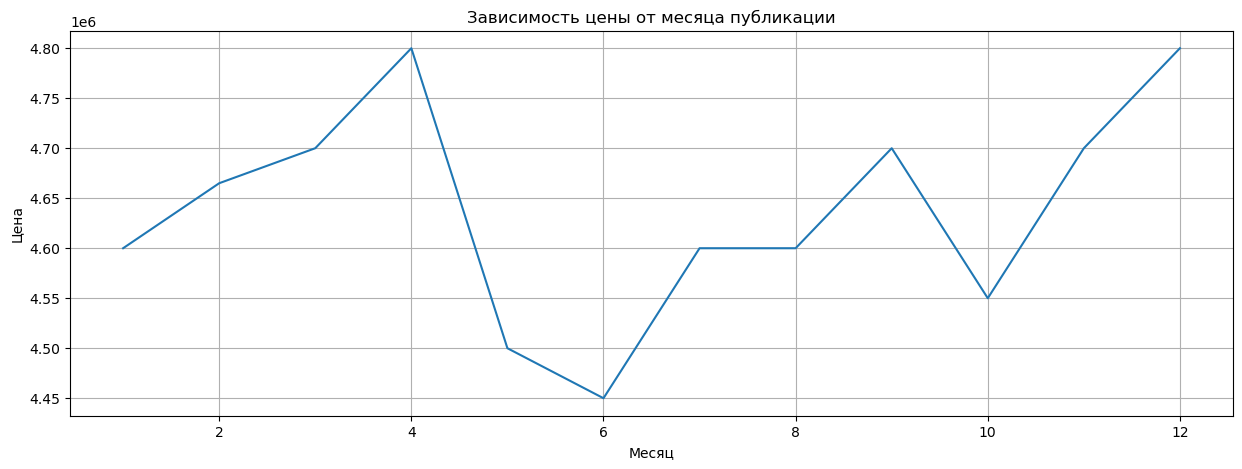

In [85]:
# зависимость цены от месяца публикации
price_date_pivot = data.pivot_table(index = 'mounth_publish', values = 'last_price', aggfunc = 'median')
price_date_pivot.plot(title = 'Зависимость цены от месяца публикации', figsize = (15, 5), grid = True, legend = False)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

Самые дорогие квартиры были опубликованы в апреле, а самые дешевые - в июне.

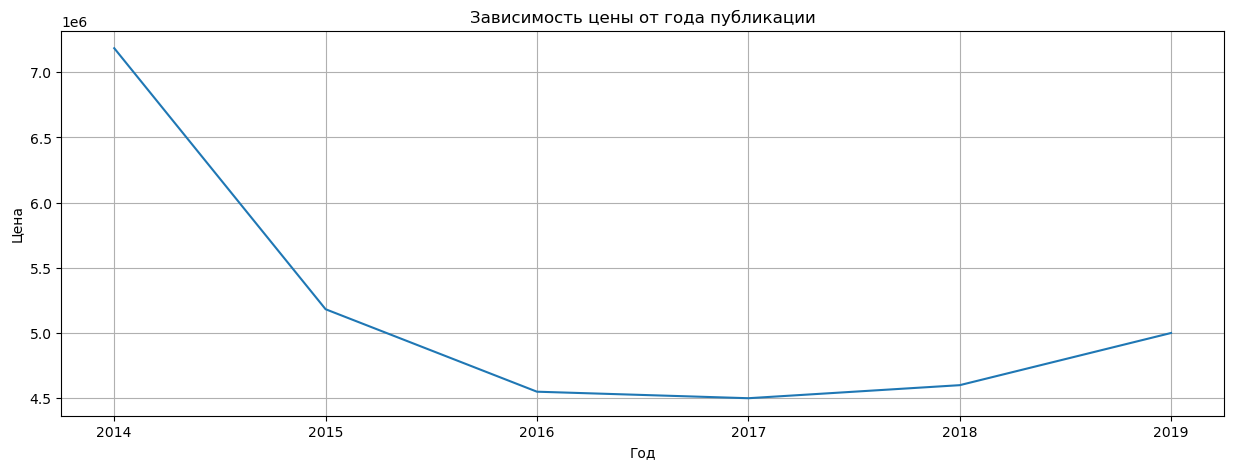

In [86]:
# зависимость цены от года публикации
price_date_pivot = data.pivot_table(index = 'year_publish', values = 'last_price', aggfunc = 'median')
price_date_pivot.plot(title = 'Зависимость цены от года публикации', figsize = (15, 5), grid = True, legend = False)
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

Самая дорогая цена была в 2014 году, потом пошел на спад и в 2017 году были самые низкие показатели по стоимости.

In [87]:
# построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов
locality_name_price = data.pivot_table(index='locality_name', values='last_price', aggfunc='count')

data['one_meter_price'] = data['last_price'] // data['total_area']

locality_mean_price = data.pivot_table(index='locality_name', values='one_meter_price', aggfunc=['count', 'mean'])
locality_mean_price.columns = locality_mean_price.columns.droplevel(1)
locality_mean_price = (locality_mean_price.reset_index()
                 .rename(columns={'locality_name': 'Населенный пункт', 
                                  'count': 'Сколько объявлений', 
                                  'mean': 'Средняя цена за м2'})
                 .sort_values(by='Сколько объявлений', ascending=False).head(10)
                 .sort_values('Средняя цена за м2', ascending=False).reset_index(drop=True))
locality_mean_price

,Населенный пункт,Сколько объявлений,Средняя цена за м2
0,Санкт-Петербург,13685,112044.074096
1,Пушкин,325,102895.233846
2,Кудрово,225,92337.982222
3,Парголово,288,90755.583333
4,Мурино,428,85731.997664
5,Петергоф,188,83969.824468
6,Шушары,389,78435.455013
7,Колпино,321,75129.414330
8,Всеволожск,356,68984.907303
9,Гатчина,284,68664.376761


Самая высокая стоимость за квадратный метр - в Санкт-Петеребурге, самая низкая в Гатчине.

Text(0, 0.5, 'Цена')

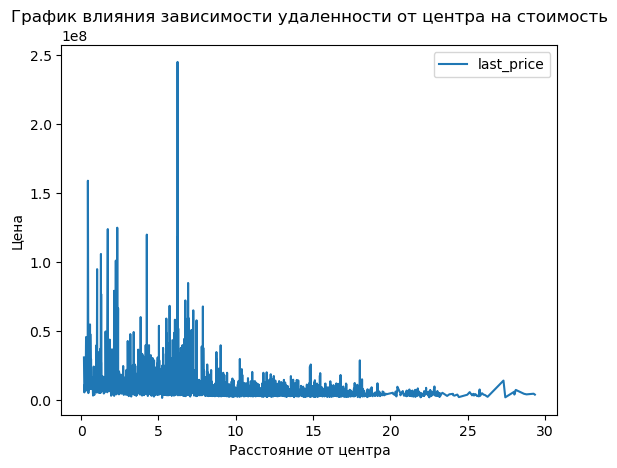

In [89]:
# построим график влияния зависимости удаленности от центра на стоимость
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest', values='last_price').plot(title = 'График влияния зависимости удаленности от центра на стоимость')
plt.xlabel('Расстояние от центра')
plt.ylabel('Цена')

По графику видно, что стоимость меньше, чем дальше от центра. Етсь незначительные скачки, которые скорее всего связаны с другими факторами, но тенденция общая остается.

## Общий вывод

Проект начали с того, что избавились от пропусков в столбцах. Где-то пропуски логично заменили значениями, остальное удалили без потери смысла общих данных. Также были изменены типы данных в столбцах для корректной работы с данными. 

Следующим шагом добавили необходимые переменные. 
Смотрим на проект в целом: количество этажей варьируется от 1 до 60. 
Расстояние до центра удобнее рассматривать в км, поэтому переводим в км и округляем. 

Стороим гистограммы по нужным параметрам и выявляем аномалии. Там, где значения явно не похожи на правду - убираем. С помощью общего описания легко можно увидеть значения, которые ну совсем не могут быть правдой. 

Строим график зависимости цены от общей площади. Видим, что с увеличением площади растет цена. Значит самые дешевые квартиры имеют небольшую площадь, и наоборот. А вот график жилой площади от стоимости рассказывает нам, что размер жилой площади практически не влияет на стоимость жилья. Но, стоимость квартиры возрастает приувеличении размера кухни. Согласна, размер кухни - важый параемтр при выборе квартиры. 

Даже количество комнат не так сильно влияет на стоимость. Я бы сказала, вообще не влияет. Во многих домах, это можно переделать уж после покупки. 

Если хотите хорошо сэкономить - надо брать квартиру на первом этаже, чуть дороже будет - на последнем. А вот квартиры между имеют ценник уже повыше.

Вообще не важно, когда было выставлено объявление о продаже квартиры. Это никак не влияет на цену. 

Если рассматривать локации квартиры, самая бюджетная будет в Выборге, а вот в Санкт-Петербурге цена за квадратный метр почти в 2 раза выше. Ну и конечно, чем дальше от центра - тем дешевле будет жилье. 

Так, что при закладывании бюджета на квартиру надо ориентироваться на:
- локацию
- удаленность от центра
- размер общей площади и отдельно размер кухни
- этаж